In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p1 = np.array([0.2, 0.4, 0.7])
p2 = np.array([0.45, 0.5, 0.58])
n_vals = np.array([20, 100, 1000, 5000])

In [3]:
def simulate_tosses(num_tosses, p_head, num_reps=1000):
    vals = np.random.choice([0, 1], size=(num_reps, num_tosses), p=[1-p_head, p_head])
    return np.sum(vals, axis=1)

In [4]:
def choose_coin_1(p_vals, n1, n, num_reps=1000):
    num_tosses = n1//3
    num_heads = np.zeros((num_reps, len(p_vals)))
    for i, p in enumerate(p_vals):
        num_heads[:, i] = simulate_tosses(num_tosses, p, num_reps)
    coin_chosen = np.argmax(num_heads, axis=1)
    correct_coin = np.argmax(p_vals)
    r_vals = np.sum(num_heads, axis=1) + p_vals[coin_chosen]*(n-n1)
    return num_heads, coin_chosen, correct_coin, r_vals

In [5]:
def algo1(p_vals, n, num_reps=1000):
    correct_choice_hist = []
    sample_r_hist=[]
    for n1 in range(3, n):
        _, chosen, correct, r_vals = choose_coin_1(p_vals, n1, n)
        correct_choice_hist.append(np.sum(chosen==correct))
        sample_r_hist.append(np.mean(r_vals))
    return correct_choice_hist, sample_r_hist

In [6]:
srh1_list=[]
srh2_list=[]
n1_max1_list=[]
n1_max2_list=[]
cc1=[]
cc2=[]
for n in n_vals:
    cch1, srh1 = algo1(p1, n)
    cch2, srh2 = algo1(p2, n)
    n1_max1 = np.argmax(srh1)
    n1_max2 = np.argmax(srh2)
    srh1_list.append(srh1)
    srh2_list.append(srh2)
    n1_max1_list.append(n1_max1+3)
    n1_max2_list.append(n1_max2+3)
    cc1.append(cch1[n1_max1])
    cc2.append(cch2[n1_max2])

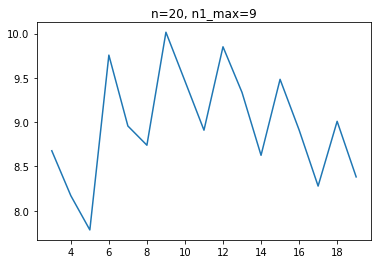

Out of 1000 reps, the correct coin was chosen 601 times


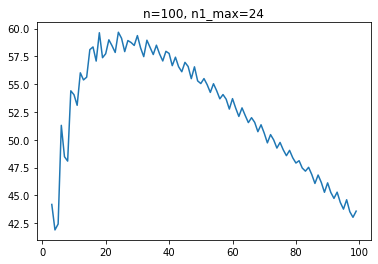

Out of 1000 reps, the correct coin was chosen 837 times


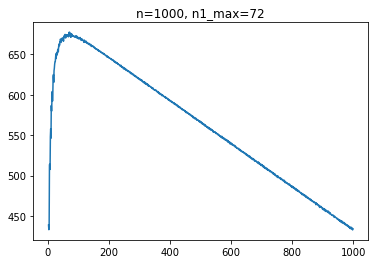

Out of 1000 reps, the correct coin was chosen 987 times


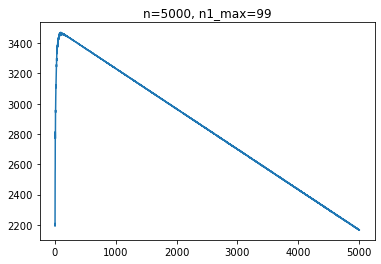

Out of 1000 reps, the correct coin was chosen 999 times


In [7]:
# p1
for i, n in enumerate(n_vals):
    plt.plot(range(3, n), srh1_list[i])
    plt.title("n="+str(n)+", n1_max="+str(n1_max1_list[i]))
    plt.savefig("set1_n_"+str(n))
    plt.show()
    print("Out of 1000 reps, the correct coin was chosen", cc1[i], "times")

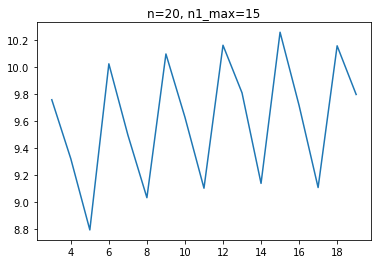

Out of 1000 reps, the correct coin was chosen 351 times


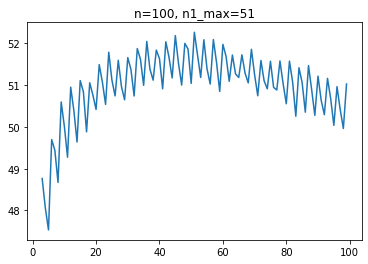

Out of 1000 reps, the correct coin was chosen 526 times


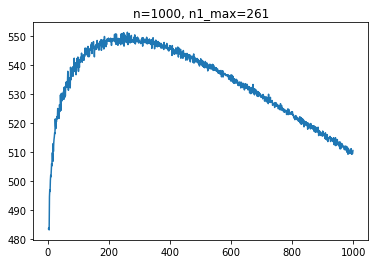

Out of 1000 reps, the correct coin was chosen 831 times


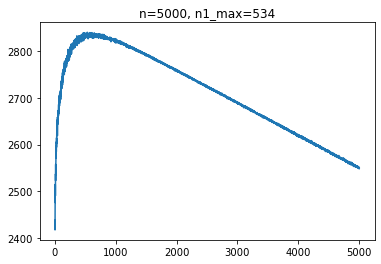

Out of 1000 reps, the correct coin was chosen 941 times


In [8]:
# p2
for i, n in enumerate(n_vals):
    plt.plot(range(3, n), srh2_list[i])
    plt.title("n="+str(n)+", n1_max="+str(n1_max2_list[i]))
    plt.savefig("set2_n_"+str(n))
    plt.show()
    print("Out of 1000 reps, the correct coin was chosen", cc2[i], "times")